In [1]:
# Assignment2 Numerical Part
# student ID: 2210365

In [2]:
# 2.6

In [3]:
#(a)
import numpy as np
def Lambda(m):
    nodes = np.linspace(-1, 1, m+1)
    # generating m+1 equally spaced nodes on [0,1] including boundaries
    def sum_of_Lm(x):
        sum = 0
        for i in range(m+1):
            Li_x = 1
            for j in range(m+1):
                if j != i:
                    Li_x *= abs((x-nodes[j])/(nodes[i]-nodes[j]))
            #calculate absolute value of each Lj(x) for j ∈{0,1,...,m}
            sum += Li_x
        return sum
    # the function returns the sum of Lj(x)
    x_values = np.linspace(-1, 1, 200)
    result = max([sum_of_Lm(x) for x in x_values])
    # taking maximum of sum of Lj(x) over 200 values of x
    return result

Λ_10 = Lambda(10)
Λ_10

29.89430628558919

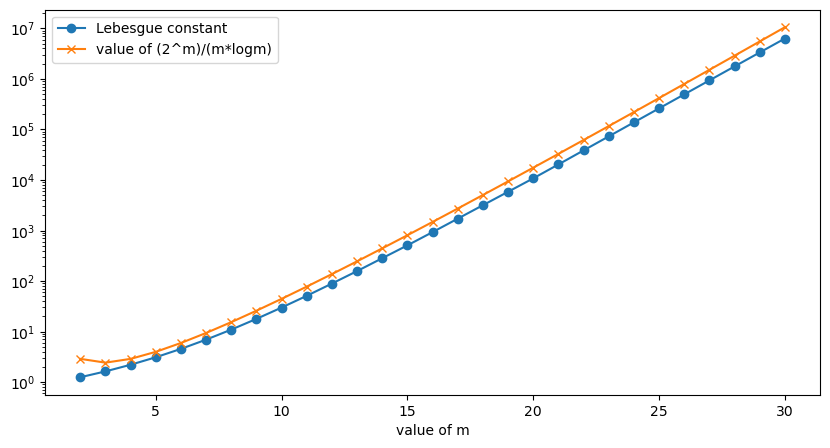

In [4]:
#(b)
import matplotlib.pyplot as plt
m_values = list(range(2, 31))
# generating values of m from 2 to 30

lambda_values = [Lambda(m) for m in m_values]
# calculate coressponding Lebesgue constant

theoretical_values = [2**m / (m * np.log(m)) for m in m_values]
# calculate value of (2^m)/(m*logm)

plt.figure(figsize=(10, 5))
plt.plot(m_values, lambda_values, label='Lebesgue constant', marker='o')
plt.plot(m_values, theoretical_values, label='value of (2^m)/(m*logm)', marker='x')

plt.yscale('log')
# Setting the y-axis to logarithmic scale

plt.xlabel('value of m')
plt.legend()
plt.show()
# As the graph shows,the computed Lebesgue constant appears to follow the trend of (2^m)/(m*logm),
# which suggests that Λm behaves like (2^m)/(m*logm) up to an unimportant multiplicative constant.

In [5]:
# The rapid increase in the Lebesgue constant Λm with the number of nodes m 
# suggests that polynomial interpolation at equally spaced points can become numerically ill-posed and unstable,
# especially for high m ,leading to poor convergence to the true function as the interpolation may oscillate wildly near the boundaries

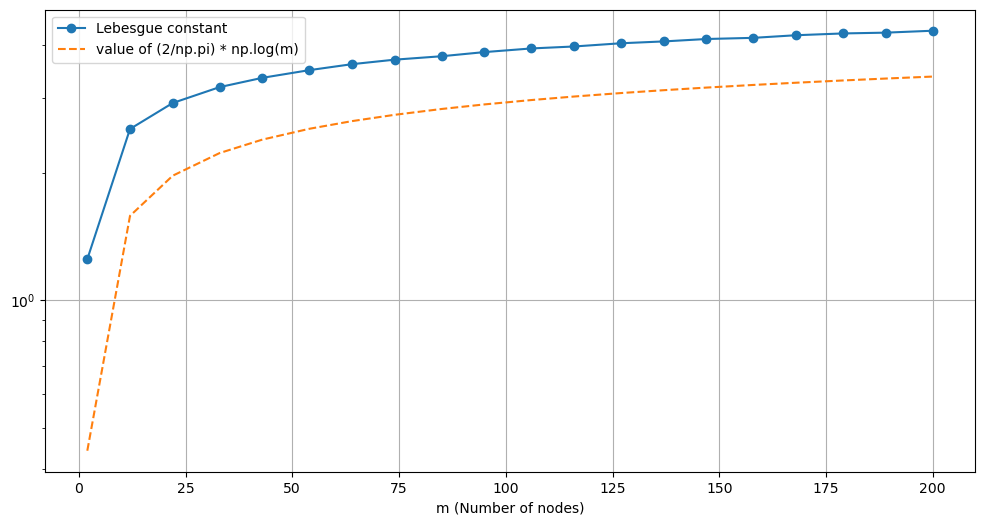

In [6]:
#(c)
def LambdaC(m):
    nodes = np.cos(np.pi * np.arange(m + 1) / m)
    # generating nodes of x_i=cos(i*pi/m)
    nodes = np.array(nodes)
    def sum_of_Lm(x):
        sum = 0
        for i in range(m+1):
            Li_x = 1
            for j in range(m+1):
                if j != i:
                    Li_x *= abs((x-nodes[j])/(nodes[i]-nodes[j]))
            #calculate absolute value of each Lj(x) for j ∈{0,1,...,m}
            sum += Li_x
        return sum
    x_values = np.linspace(-1, 1, 200)
    result = max([sum_of_Lm(x) for x in x_values])
    # taking maximum of sum of Lj(x) over 200 values of x
    return result

m_values = np.linspace(2, 200, num=20, dtype=int)
lambdaC_values = [LambdaC(m) for m in m_values]  # compute LambdaC for each m
theoretical_values = [(2/np.pi) * np.log(m) for m in m_values]

# plot graphs
plt.figure(figsize=(12, 6))
plt.plot(m_values, lambdaC_values, label='Lebesgue constant ', marker='o')
plt.plot(m_values, theoretical_values, label='value of (2/np.pi) * np.log(m)', linestyle='--')
plt.yscale('log')  # Logarithmic scale for y-axis
plt.xlabel('m (Number of nodes)')
plt.legend()
plt.grid(True)
plt.show()
# Based on the graph,the computed Lebesgue constant for Chebyshev nodes closely follows
# the theoretical trend (2/np.pi) * np.log(m) when adjusted for an additive constant.

In [7]:
# The graph indicates that the Lebesgue constant for Chebyshev nodes grows much more slowly than for equally spaced nodes,
# suggesting that interpolation with Chebyshev nodes is more stable and provides better numerical properties,
# such as improved convergence and reduced oscillation at the boundaries.

In [8]:
#2.7

In [9]:
#(a)
import numpy as np

# implement recursive process
def recursive_f(f, nodes):
    if len(nodes) == 1:
        return f(nodes[0])
    else:
        first_nodes = nodes[:-1]
        last_nodes = nodes[1:]
        return (recursive_f(f, last_nodes) - recursive_f(f, first_nodes)) / (nodes[-1] - nodes[0])


nodes = np.array([0, 1, 2, 3])
recursive_f(np.sin, nodes)

-0.010393219665581396

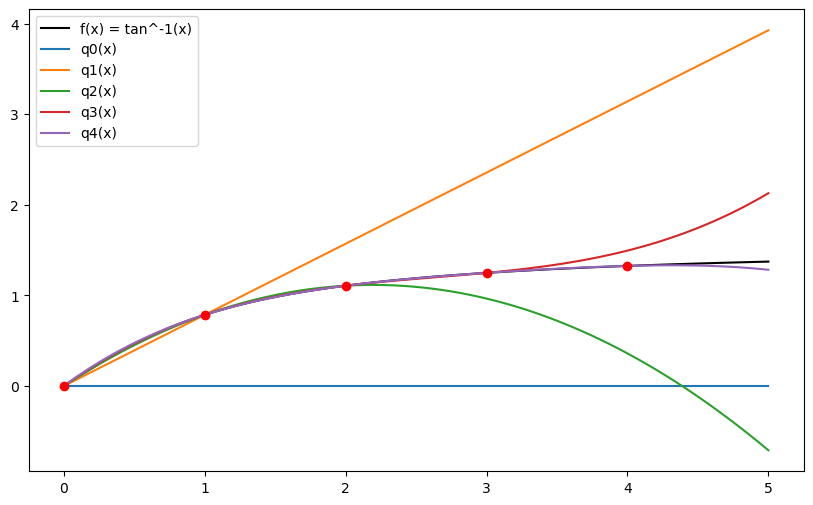

In [10]:
#(b)
# implement qk
def qk(f, nodes, k, x):
    result = f(nodes[0])
    for i in range(1, k+1):
        addition = recursive_f(f, nodes[:i+1])
        for j in range(i):
            addition *= (x - nodes[j])
        result += addition
    return result

nodes = np.array([0, 1, 2, 3, 4])
x_values = np.linspace(0, 5, 100)
plt.figure(figsize=(10, 6))

# plot graph of f(x)=arctan(x)
plt.plot(x_values, np.arctan(x_values), label='f(x) = tan^-1(x)', color='black')

# plot graphs of qk for different k values
for k in range(len(nodes)):
    qk_values = [qk(np.arctan, nodes, k, x) for x in x_values]
    plt.plot(x_values, qk_values, label=f'q{k}(x)')
# add labels
plt.scatter(nodes, np.arctan(nodes), color='red', zorder=5)
plt.legend()
plt.show()

In [11]:
#2.8
# Implement the midpoint rule
def midpoint(f, a, b, n=1000):
    h = (b - a) / n
    result = 0
    for i in range(n):
        result += f((a + h/2) + i*h)
    result *= h
    return result

# Implement the trapezoidal rule
def trapezoidal(f, a, b, n=1000):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i*h)
    result *= h
    return result

# Implement Simpson's rule
def simpson(f, a, b, n=1000):
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        result += 4 * f(a + i*h)
    for i in range(2, n-1, 2):
        result += 2 * f(a + i*h)
    result *= h / 3
    return result

In [12]:
#(a)
import pandas as pd

def f(x):
    return np.exp(2*x)

exact_value = (np.exp(2) - np.exp(-2)) / 2

# calculate approximate value
midpoint_val = midpoint(f, -1, 1)
trapezoidal_val = trapezoidal(f, -1, 1)
simpson_val = simpson(f, -1, 1)

#calculate absolute error values and round to 3 significant digits
midpoint_error = "{:.2e}".format(abs(midpoint_val - exact_value))
trapezoidal_error = "{:.2e}".format(abs(trapezoidal_val - exact_value))
simpson_error = "{:.2e}".format(abs(simpson_val - exact_value))

# collect result in dataframe, which can be presented as a table
results_df = pd.DataFrame({
    'Method': ['Midpoint', 'Trapezoidal', 'Simpson'],
    'Value': [midpoint_val, trapezoidal_val, simpson_val],
    'Error': [midpoint_error, trapezoidal_error, simpson_error]
})

results_df

,Method,Value,Error
0,Midpoint,3.626858,2.42e-06
1,Trapezoidal,3.626865,4.84e-06
2,Simpson,3.626860,5.15e-12


In [13]:
# All three numerical methods provided approximations very close to the exact value
# The Simpson's method provided the most accurate approximation

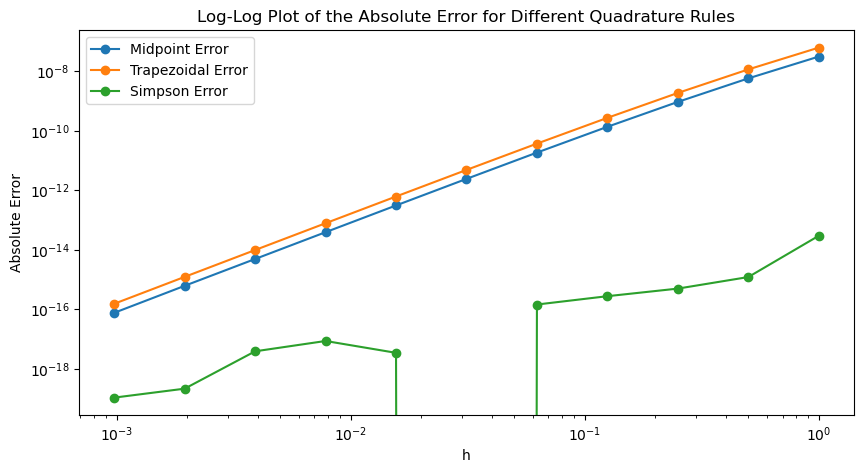

In [14]:
#(b)
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + x)
def exact_integral(h):
    return np.log(1 + h)

h_values = [2**-k for k in range(11)]
errors_midpoint = []
errors_trapezoidal = []
errors_simpson = []
# calculate all absolute error gained by 3 methods
for h in h_values:
    midpoint_val = midpoint(f, 0, h)
    trapezoidal_val = trapezoidal(f, 0, h)
    simpson_val = simpson(f, 0, h)
    exact_val = exact_integral(h)
    errors_midpoint.append(abs(midpoint_val - exact_val))
    errors_trapezoidal.append(abs(trapezoidal_val - exact_val))
    errors_simpson.append(abs(simpson_val - exact_val))

# plot graphs
plt.figure(figsize=(10, 5))
plt.loglog(h_values, errors_midpoint, 'o-', label='Midpoint Error')
plt.loglog(h_values, errors_trapezoidal, 'o-', label='Trapezoidal Error')
plt.loglog(h_values, errors_simpson, 'o-', label='Simpson Error')
# add labels
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Log-Log Plot of the Absolute Error for Different Quadrature Rules')
plt.legend()

plt.show()

In [15]:
# Observations from the plot of the absolute error of the three quadrature rules against h on a log-log scale indicate that
# as h decreases, the error for each method decreases as well
# The rate at which the error decreases is related to the order of the error term for each rule
# the error for the trapezoidal rule scales with h^2 and for Simpson's rule with h^4 as per the lecture content,
# which reflects a higher degree of accuracy for smaller h values in Simpson's rule due to its higher-order error term.
# The lecture notes explain that the error for the midpoint and trapezoidal rules is generally of the order O(h^2),
# while for Simpson's rule it is of the order O(h^4) when the function being integrated is smooth enough
# These can be evident from the slopes in the log-log plot

In [16]:
#(c)

# Implement EOC
def calculate_eoc(error_list):
    eoc_list = []
    for i in range(1, len(error_list)):
        if error_list[i] != 0 and error_list[i-1] != 0:
            eoc = np.log(error_list[i-1] / error_list[i]) / np.log(2)
            eoc_list.append(eoc)
        else:
            eoc_list.append(None)  # if the error is 0,then EOC is not defined
    return eoc_list

eoc_midpoint = calculate_eoc(errors_midpoint)
eoc_trapezoidal = calculate_eoc(errors_trapezoidal)
eoc_simpson = calculate_eoc(errors_simpson)
eoc_results_df = pd.DataFrame({
    'h': h_values[1:], # The first EOC is not defined
    'Midpoint': eoc_midpoint,
    'Trapezoidal': eoc_trapezoidal,
    'Simpson': eoc_simpson
})

eoc_results_df

,h,Midpoint,Trapezoidal,Simpson
0,0.500000,2.432959,2.432959,4.606658
1,0.250000,2.625934,2.625934,1.289507
2,0.125000,2.778455,2.778457,0.847997
3,0.062500,2.878145,2.878143,0.929611
4,0.031250,2.935898,2.935896,NaN
5,0.015625,2.966971,2.967096,NaN
6,0.007812,2.983258,2.983185,-1.321928
7,0.003906,2.991963,2.991408,1.152003
8,0.001953,2.993047,2.996331,4.169925
9,0.000977,3.016233,3.002276,1.000000
